# Time-Delay of Arrival (TDoA) and Direction of Arrival (DoA) Estimation

In [multi-channel speech enhancement](Multi-channel_speech_enhancement.md), a regularly appearing task is to estimate the time-delay between channels or equivalently, the angle at which a wavefront arrives to an array of microphones. By knowing the time-delay or angle of arrival, we can use beamforming to isolate sounds from that particular direction. 
A frequently used method for time-delay estimation is the generalized cross-correlation (GCC) method and especially its PHAT-weighted variant known as GCC-PHAT {cite:p}`knapp1976gcc,azaria1984time,byoungho2010gccphat`.

<!--
Suppose we have two channels, for which we have analyzed the [short-time Fourier transforms (STFT)](stft), $X_{1,k,t}$, and $X_{2,k,t}$, where $k$ is the frequency bin and $t$ the frame index. The frequency components correspond to complex values of the form


**Under construction**

$a_1 e^{i (b_1 + k+t)}$ and $a_2 e^{i (b_2 +k+t)}$.
If time-delay between the two channels is $\delta=b_2-b_1$, then we have $e^{i (b_1 + k+t)} \approx e^{i (\delta + b_1 +k+t)}$. In other words,
$$
e^{i\delta} = e^{i (b_1 + k+t- b_1 -k-t)}
$$
-->

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
import IPython.display as ipd
from helper_functions import stft

# read from storage
filename = 'sounds/temp.wav'
fs, data = wavfile.read(filename)

delay_samples = 20
delay_zeros = np.zeros(delay_samples)

data1 = np.concatenate((data,delay_zeros))
data2 = np.concatenate((delay_zeros,data))

noise_gain_dB = -10
noise_gain = np.std(data)*10**(noise_gain_dB/20)

observation1 = data1 + noise_gain*np.random.randn(len(data1))
observation2 = data2 + noise_gain*np.random.randn(len(data1))

In [2]:
X1 = stft(observation1,fs)
X2 = stft(observation2,fs)

crossspectrum = np.mean(np.conj(X1)*X2,axis=0)
crosscorrelation = scipy.fft.irfft(crossspectrum/np.abs(crossspectrum))

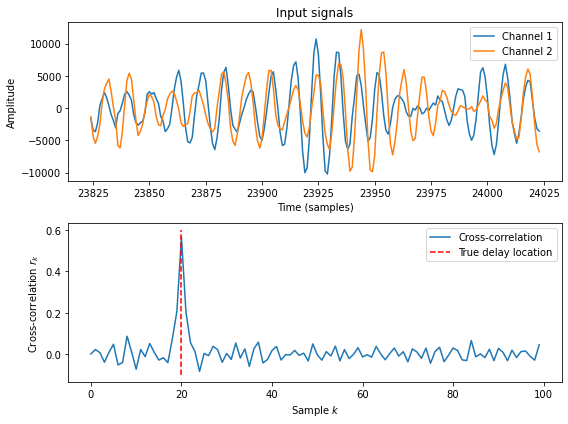

In [3]:
plt.figure(figsize=[8,6])
plt.subplot(211)
ix = np.argmax(observation1)
plt.plot(range(ix-100,ix+100),observation1[(ix-100):(ix+100)],label='Channel 1')
plt.plot(range(ix-100,ix+100),observation2[(ix-100):(ix+100)],label='Channel 2')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Input signals')

plt.subplot(212)
plt.plot(crosscorrelation[0:100],label='Cross-correlation')
plt.plot([delay_samples,delay_samples],[-.1,.6],'r--',label='True delay location')
plt.legend()
plt.xlabel('Sample $k$')
plt.ylabel('Cross-correlation $r_k$')

plt.tight_layout()
plt.show()


## References

```{bibliography}
:filter: docname in docnames
```